In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

In [ ]:
data_fake=pd.read_csv('Fake.csv')
data_true=pd.read_csv('True.csv')

In [ ]:
data_fake['class'] = 0
data_true['class'] = 1

In [ ]:
data_fake.shape, data_true.shape

((23481, 5), (21417, 5))

In [ ]:
data_fake_manual_testing = data_fake.tail(10)
for i in range (23480,23470, -1):
  data_fake.drop([i], axis = 0, inplace = True)

data_true_manual_testing = data_true.tail(10)
for i in range (21416, 21406, -1):
  data_true.drop([i], axis = 0, inplace = True)

In [ ]:
data_fake.shape, data_true.shape

((23471, 5), (21407, 5))

In [ ]:
data_fake_manual_testing['class'] = 0
data_true_manual_testing['class'] = 1

<ipython-input-7-90008d39c97b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fake_manual_testing['class'] = 0
<ipython-input-7-90008d39c97b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_true_manual_testing['class'] = 1


In [ ]:
data_fake_manual_testing.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [ ]:
data_merge = pd.concat([data_fake, data_true], axis = 0)
data_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [ ]:
data_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [ ]:
data = data_merge.drop(['title', 'subject', 'date'], axis = 1)

In [ ]:
data.isnull().sum()

,0
text,0
class,0


In [ ]:
data = data.sample(frac = 1)

In [ ]:
data.head(5)

,text,class
4078,The presidential debates have been comedy gold...,0
17363,"MANCHESTER, N.H. (Reuters) - Since fleeing de...",1
5053,"Usually, Donald Trump spokesperson Katrina Pie...",0
16763,MADRID (Reuters) - Regional leader of Cataloni...,1
2530,MOSCOW (Reuters) - Cooperation between Russia ...,1


In [ ]:
data.reset_index(inplace = True)
data.drop(['index'], axis = 1, inplace = True)

In [ ]:
data.columns

Index(['text', 'class'], dtype='object')

In [ ]:
def wordopt(text):
  text = text.lower ()
  text = re.sub('\[. *?\]','',text)
  text = re.sub("\\W"," ",text)
  text = re.sub('https?://\S+|www\.\S+', '', text)
  text = re.sub('<.*?›+', '', text)
  text = re.sub('[%s]' % re.escape(string.punctuation),'', text)
  text = re.sub( "\n",' ',text)
  text = re.sub('\w*\d\w*','',text)
  return text

In [ ]:
data['text'] = data['text'].apply(wordopt)

In [ ]:
x = data['text']
y = data['class']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.25,random_state=42)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer ()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(xv_train, y_train)

LogisticRegression()

In [ ]:
pred_lr=LR.predict(xv_test)

In [ ]:
LR.score(xv_test, y_test)

0.9857397504456328

In [ ]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5900
           1       0.98      0.99      0.98      5320

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [ ]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [ ]:
pred_dtc=DT.predict(xv_test)

In [ ]:
DT.score(xv_test, y_test)

0.9947415329768271

In [ ]:
print(classification_report(y_test, pred_dtc))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5900
           1       1.00      0.99      0.99      5320

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(xv_train, y_train)

RandomForestClassifier()

In [ ]:
pred_rf = RF.predict(xv_test)

In [ ]:
RF.score(xv_test, y_test)

0.9906417112299465

In [ ]:
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5900
           1       0.99      0.99      0.99      5320

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [ ]:
def output_label(n):
  if n == 0:
    return "Fake News"
  elif n == 1:
    return "Not A Fake News"


In [ ]:
def manual_testing (news):
  testing_news = {"text": [news]}
  new_def_test = pd.DataFrame(testing_news)
  new_def_test["text"] = new_def_test["text"].apply(wordopt)
  new_x_test = new_def_test[ "text"]
  new_xv_test = vectorization.transform(new_x_test)
  pred_DT = DT.predict(new_xv_test)
  return print("In DT Prediction: {}".format(output_label(pred_DT[0])))

In [ ]:
news = str(input())

Bengaluru-based space start-up Pixxel has launched India's first private earth imaging satellite constellation. The constellation, dubbed 'Firefly,' was successfully deployed into a 550km low Earth orbit. The milestone was achieved using SpaceX's Falcon-9 rocket launched from Vandenberg Space Force Base in California. Three more satellites will be launched later this year as part of the project.


In [ ]:
manual_testing(news)

In DT Prediction: Fake News


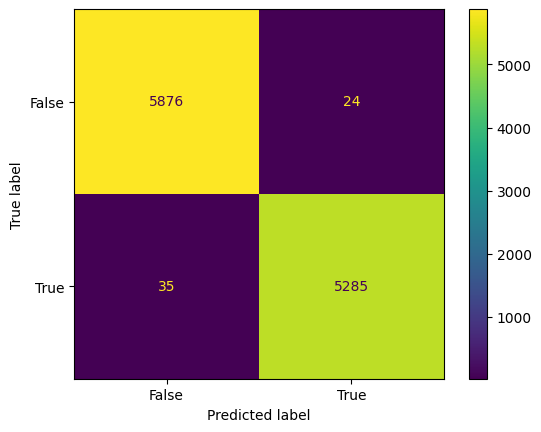

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = metrics.confusion_matrix(y_test, pred_dtc)

# Display the confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])

cm_display.plot()
plt.show()
